In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.stats import norm

 ## 1) visualisation of the asset price depending to the drift

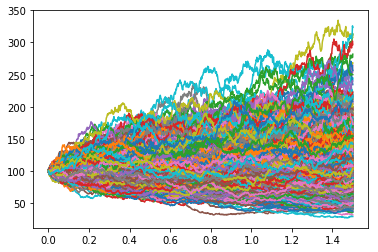

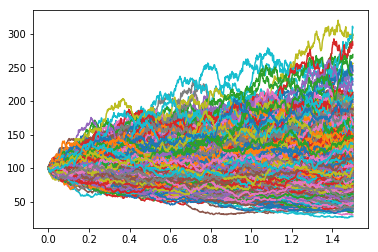

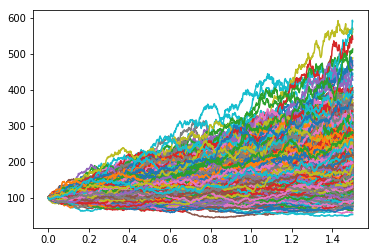

In [2]:
N=1000
n=1000
T=1.5
sigma=0.3
S_0=100
pas = T/n
times=np.linspace(0,T,n)
echantillon=np.random.normal(0,np.sqrt(pas), size=(N,n-1))
trajectoires =np.cumsum(echantillon, axis=1)
trajectoires=np.hstack((np.array([np.array([0]*N)]).T,trajectoires))
nu_1 = 0.05
S_1 = S_0*np.exp((nu_1-(sigma**2)/2)*times + sigma*trajectoires)
nu_2 = 0.02
S_2 = S_0*np.exp((nu_2-(sigma**2)/2)*times + sigma*trajectoires)
nu_3 = 0.45
S_3 = S_0*np.exp((nu_3-(sigma**2)/2)*times + sigma*trajectoires)

for i in range(N):
    plt.plot(times,S_1[i])
plt.show()
for i in range(N):
    plt.plot(times,S_2[i])
plt.show()
for i in range(N):
    plt.plot(times,S_3[i])
plt.show()

In [3]:
def mean_var(S,n):
    mean=[]
    var=[]
    for i in range(n):
        mean.append(np.mean(S[:,i]))
        var.append(np.var(S[:,i]))
    return [mean, var]

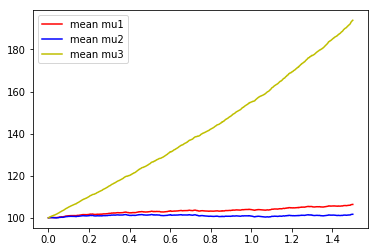

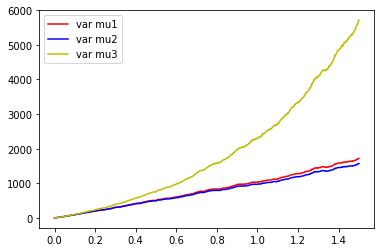

In [4]:
intergers=range(n)
"pour mu = 0.05"
plt.plot(times,mean_var(S_1,n)[0], label = "mean mu1",color='r')
"pour mu = 0.02"
plt.plot(times,mean_var(S_2,n)[0], label = "mean mu2",color='b')
"pour mu = 0.45"
plt.plot(times,mean_var(S_3,n)[0], label = "mean mu3",color='y')
plt.legend()
plt.show()

plt.plot(times,mean_var(S_1,n)[1], label = "var mu1",color='r')
plt.plot(times,mean_var(S_2,n)[1], label = "var mu2",color='b')
plt.plot(times,mean_var(S_3,n)[1], label = "var mu3",color='y')
plt.legend()
plt.show()

## comment
we can see on the plot that the average of S_t increase the high when the drift mu=0.45 > mu=0.05;0.02, that confirm the theorical calculation, thus the parameter mu is very important and can bring a great modification on the evolution of S_t

## 2- computing and visualisation of the profit and lost

## 2-a compute X_T

In [5]:
def d(s,k,v,sign):
    return np.log(s/k)/np.sqrt(v) + sign*np.sqrt(v)
def BS(S_0,K,T):
    return S_0*norm.cdf(d(S_0,K*np.exp(-r*T),T*sigma**2,1))-K*np.exp(-r*T)*norm.cdf(d(S_0,K*np.exp(-r*T),T*sigma**2,-1))
def Delta(S_t, K, T,t):
    return norm.cdf(d(S_t,K*np.exp(-r*(T-t)),(T-t)*sigma**2,1))

# computation of N samples of X_T_n
def X(S,times,K):
    Y_n = BS(S_0,K,T)+np.sum(Delta(S[:,:-1], K, T,times[:-1])*(np.exp(-r*times[1:])*trajectoires[:,1:]-np.exp(-r*times[:-1])*trajectoires[:,:-1]), axis=1)
    return np.exp(r*T)*Y_n

## Visualisation

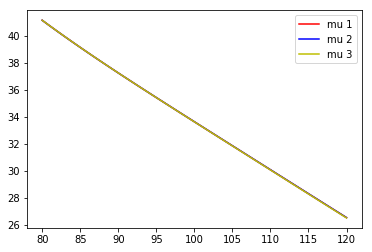

In [6]:
r=0.05
mean_1=[]
Ks=range(80,121)
for K in Ks:
    mean_1.append(np.mean(X(S_1,times,K)))
plt.plot(Ks,mean_1, label="mu 1",color='r')
mean_2=[]
Ks=range(80,121)
for K in Ks:
    mean_2.append(np.mean(X(S_2,times,K)))
plt.plot(Ks,mean_2,label="mu 2",color='b')
mean_3=[]
for K in Ks:
    mean_3.append(np.mean(X(S_3,times,K)))
plt.plot(Ks,mean_3,label="mu 3",color='y')

plt.legend()
plt.show()

## 2-b compute de profit and Lost

In [7]:
def PL_T(S,K):
    return X(S,times,K)-(np.array([[0]*N,S[:,-1]-K]).T).max(axis=1)

## 2-c visualisation

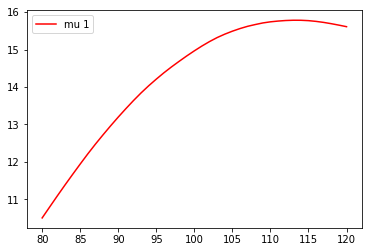

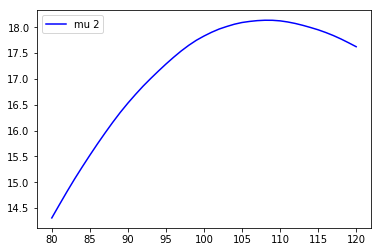

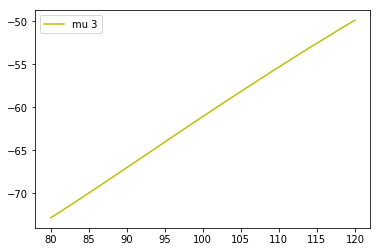

In [12]:
mean_1=[]
var_1=[]
Ks=range(80,121)
for K in Ks:
    mean_1.append(np.mean(PL_T(S_1,K)))
    var_1.append(np.var(PL_T(S_1,K)))
plt.plot(Ks,mean_1, label="mu 1",color='r')
plt.xlabel=("Strike")
plt.ylabel=("P&L")
plt.legend()
plt.show()
mean_2=[]
var_2=[]
Ks=range(80,121)
for K in Ks:
    mean_2.append(np.mean(PL_T(S_2,K)))
    var_2.append(np.var(PL_T(S_2,K)))
plt.plot(Ks,mean_2, label="mu 2",color='b')
plt.xlabel=("Strike")
plt.ylabel=("P&L")
plt.legend()
plt.show()
mean_3=[]
var_3=[]
for K in Ks:
    mean_3.append(np.mean(PL_T(S_3,K)))
    var_3.append(np.var(PL_T(S_3,K)))
plt.plot(Ks,mean_3, label="mu 3",color='y')
plt.xlabel=("Strike")
plt.ylabel=("P&L")
plt.legend()
plt.show()

## Comment
we can see again that the drift mu is influencing the P&L of the heging strategy at the point that, the P&L decrease whith mu (increase) that is because mu is influencing S_t and we want S_t as small as posible to make profit.

On an other hand, we can observe that the P&L is a concave function depending on the strike K (when n=1000), thus, there is an optimal strike K_opt which maximise the P&L and this K_opt is increasing with the drift mu (when the P&L is decreasing), that is respecting the no-dominance principal: the higher drift mu is high the higher the risk (to lose in this strategy) is high. Thus, a high strike K is needed to minimise the payoff then to maximise the P&L.

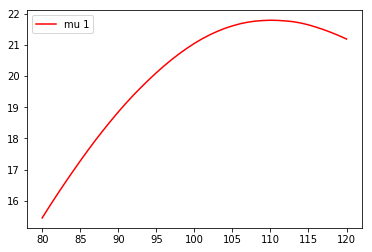

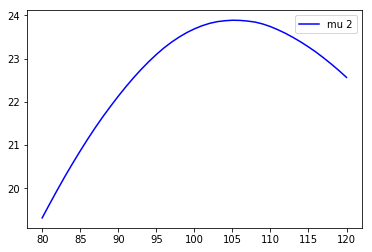

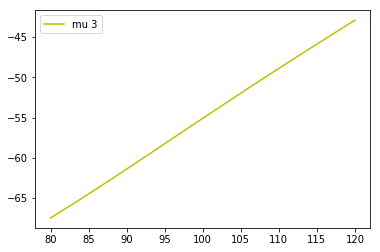

In [22]:
N=1000
n=2
T=1.5
sigma=0.3
S_0=100
pas = T/n
times=np.linspace(0,T,n)
echantillon=np.random.normal(0,np.sqrt(pas), size=(N,n-1))
trajectoires =np.cumsum(echantillon, axis=1)
trajectoires=np.hstack((np.array([np.array([0]*N)]).T,trajectoires))
nu_1 = 0.05
S_1 = S_0*np.exp((nu_1-(sigma**2)/2)*times + sigma*trajectoires)
nu_2 = 0.02
S_2 = S_0*np.exp((nu_2-(sigma**2)/2)*times + sigma*trajectoires)
nu_3 = 0.45
S_3 = S_0*np.exp((nu_3-(sigma**2)/2)*times + sigma*trajectoires)


mean_1=[]
var_1=[]
Ks=range(80,121)
for K in Ks:
    mean_1.append(np.mean(PL_T(S_1,K)))
    var_1.append(np.var(PL_T(S_1,K)))
plt.plot(Ks,mean_1, label="mu 1",color='r')
plt.legend()
plt.show()
mean_2=[]
var_2=[]
Ks=range(80,121)
for K in Ks:
    mean_2.append(np.mean(PL_T(S_2,K)))
    var_2.append(np.var(PL_T(S_2,K)))
plt.plot(Ks,mean_2, label="mu 2",color='b')
plt.legend()
plt.show()
mean_3=[]
var_3=[]
for K in Ks:
    mean_3.append(np.mean(PL_T(S_3,K)))
    var_3.append(np.var(PL_T(S_3,K)))
plt.plot(Ks,mean_3, label="mu 3",color='y')
plt.legend()
plt.show()

## Comment
here when we try with different size of n we can observe that the set of P&L is changing and optimal strike K decrease when n decrease
that is because n is influencing the time incrementation which play on the price asset (S_t) evolution in average